# Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Utility Function

In [2]:
def initialize_params(n_features):
  w_list = []
  bias = 0

  for i in range(n_features):
    w_list.append(random.gauss(mu=0.0, sigma=0.01))

  return np.array(w_list), bias

In [3]:
def predict(W, b, x):
  return np.dot(x,W) + b

def compute_loss_mse(y_hat,y):
  return (y_hat-y)**2

def compute_gradient_weight(x,y_hat,y):
  return 2*(y_hat-y)*x

def compute_gradient_bias(x,y_hat,y):
  return 2*(y_hat-y)

def update_weight(w,lr,dw):
  return w-lr*dw

def update_bias(b,lr,db):
  return b-lr*db

# Stochastic Gradient Descent

In [4]:
def SGD_linear_regression(X,y,lr=1e-5,epoch=50):
  loss_list = []
  W, b = initialize_params(X.shape[1])
  N = len(y)

  for i in range(epoch):
    for j in range(N):
      # Step 1: Compute y_hat
      y_hat = predict(W,b,X[j])

      # Step 2: Compute loss
      loss = compute_loss_mse(y_hat,y[j])

      # Step 3: Compute Deriative
      dw = compute_gradient_weight(X[j],y_hat,y[j])
      db = compute_gradient_bias(X[j],y_hat,y[j])

      # Step 4: Update Parameter:
      W = update_weight(W,lr,dw)
      b = update_bias(b,lr,db)

      loss_list.append(loss)
  return W,b,loss_list

# Mini Batch Gradient Descent

In [5]:
def get_mini_batch(X,y,batch_size):

  index_max = X.shape[0]

  indices = np.random.choice(index_max,batch_size,replace=False)

  X_batch = X[indices]
  y_batch = y[indices]

  return X_batch,y_batch

In [6]:
def mini_batch_linear_regression(X,y,lr=1e-5,epoch=50,batch_size=10):
  loss_list = []
  W, b = initialize_params(X.shape[1])

  X_batch,y_batch = get_mini_batch(X,y,batch_size)

  for i in range(epoch):
    temp_loss = 0
    temp_dw = 0
    temp_db = 0
    for j in range(batch_size):
      # Step 1: Compute y_hat
      y_hat = predict(W,b,X_batch[j])

      # Step 2: Compute loss
      loss = compute_loss_mse(y_hat,y_batch[j])

      # Step 3: Compute derivative
      dw = compute_gradient_weight(X_batch[j],y_hat,y_batch[j])
      db = compute_gradient_bias(X_batch[j],y_hat,y_batch[j])

      # Step 4: Accumulate loss and derivative
      temp_loss += loss
      temp_dw += dw
      temp_db += db

    # Step 5: Update parameter
    W = update_weight(W,lr,temp_dw/batch_size)
    b = update_bias(b,lr,temp_db/batch_size)

    loss_list.append(temp_loss)

  return W,b,loss_list


# Batch Graident Descent

In [7]:
def batch_linear_regression(X,y,lr=1e-5,epoch=50):
  loss_list = []
  W, b = initialize_params(X.shape[1])
  N = len(y)

  for i in range(epoch):
    temp_loss = 0
    temp_dw = 0
    temp_db = 0

    for j in range(N):
      # Step 1: Compute y_hat
      y_hat = predict(W,b,X[j])

      # Step 2: Compute loss
      loss = compute_loss_mse(y_hat,y[j])

      # Step 3: Compute Deriative
      dw = compute_gradient_weight(X[j],y_hat,y[j])
      db = compute_gradient_bias(X[j],y_hat,y[j])

      # Step 4: Accumulate loss
      temp_loss += loss
      temp_dw += dw
      temp_db += db

    # Step 5: Update Parameter:
    W = update_weight(W,lr,temp_dw/N)
    b = update_bias(b,lr,temp_db/N)

    loss_list.append(temp_loss/N)
  return W,b,loss_list

# Test

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Project/AIO/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
X = df.drop(columns=['Sales']).to_numpy()
y = df['Sales'].to_numpy()

In [11]:
W_SGD, b_SGD,loss_list_SGD= SGD_linear_regression(X,y)
W_mini_batch, b_mini_batch,loss_list_mini_batch= mini_batch_linear_regression(X,y)
W_batch, b_batch,loss_list_batch= batch_linear_regression(X,y)

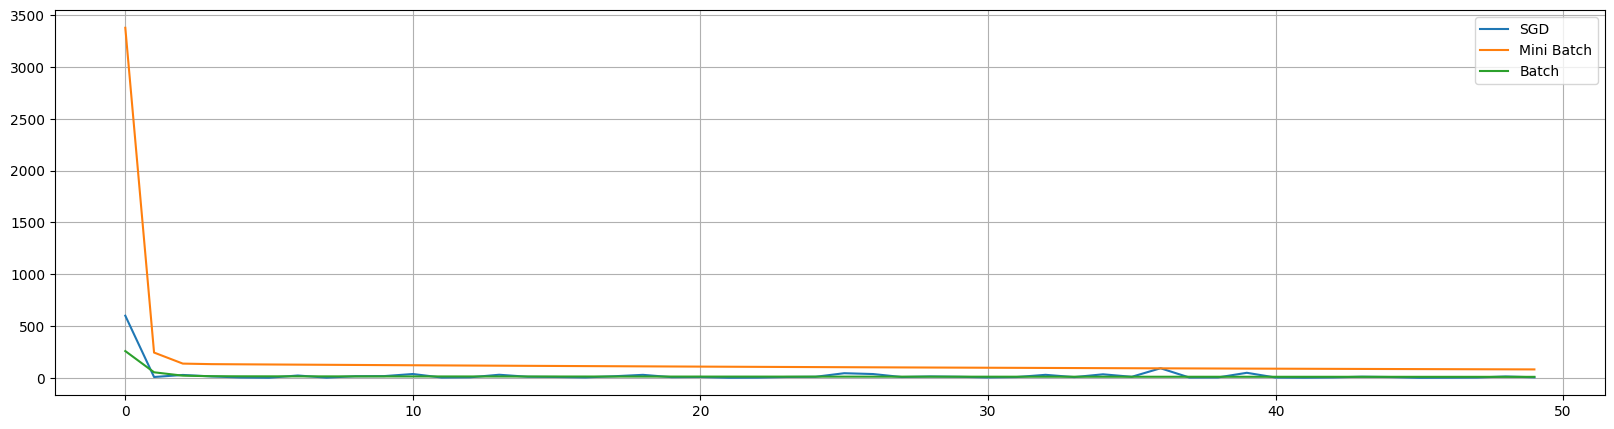

In [17]:
plt.figure(figsize=(20,5))
plt.plot(loss_list_SGD[:50],label='SGD')
plt.plot(loss_list_mini_batch[:100],label='Mini Batch')
plt.plot(loss_list_batch[:100],label='Batch')
plt.legend()
plt.grid(True)
plt.show()